In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

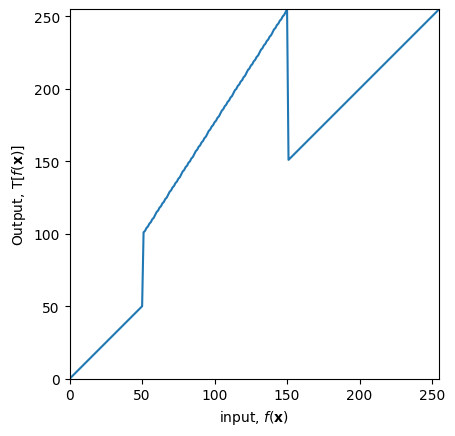

In [19]:
c = np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])
t1 = np.linspace(0,c[0,1], c[0,0]+1).astype('uint8')
t2 = np.linspace(c[1,1]+1,c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1]+1,c[4,1], c[4,0]-c[3,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


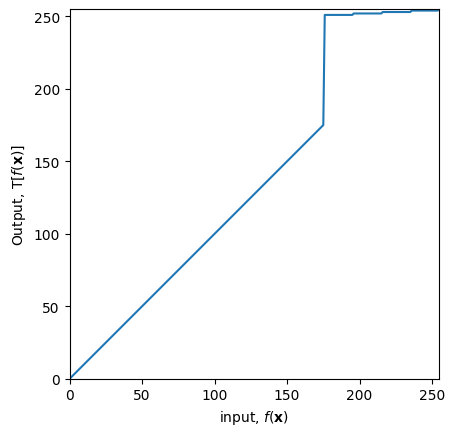

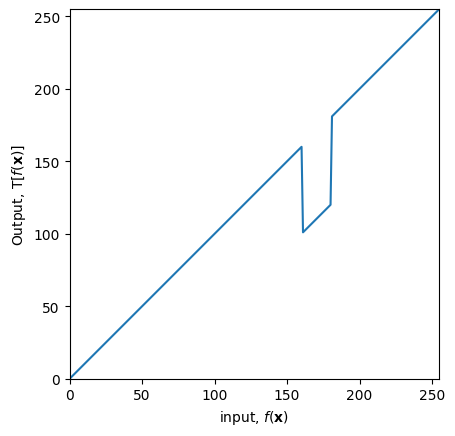

In [6]:
c = np.array([(0,0),(160,160),(160,100),(180,120),(180,180),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

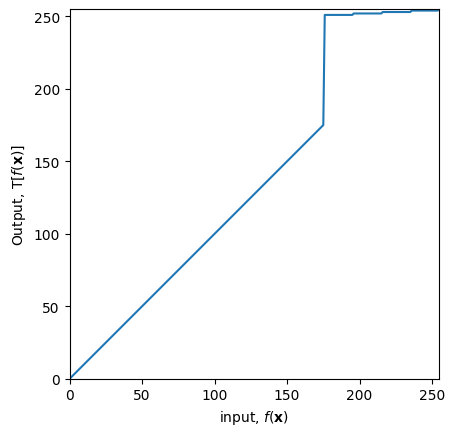

In [7]:
c = np.array([(0,0),(175,175),(175,250),(255,255),(255,255),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
img_orig = cv.imread('highlights_and_shadows.jpg')
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l, a, b = cv.split(img_lab)
gamma = 0.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(l,table)
img_gamma = cv.merge((img_gamma,a,b))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2BGR)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('Image', img_gamma)
cv.waitKey(0)
cv.destroyAllWindows()



In [20]:
def incr_vibr(x,a,sigma):
    f = x + (a/128 * np.e**(-(x-128)**2/(2*sigma**2)))
    return min(f,255)

In [30]:
sigma = 70
a = 200
img_orig = cv.imread('spider.png')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v =   cv.split(img_orig)

for i in range(len(s)):
    for j in range(len(s[0])):
        s[i][j] = incr_vibr(s[i][j], a, sigma)

img_final = cv.merge((h,s,v))
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2BGR)

cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('Image', img_final)
cv.waitKey(0)
cv.destroyAllWindows()


[[[205 197 182]
  [203 195 182]
  [204 196 182]
  ...
  [122 117 107]
  [120 114 103]
  [118 111  99]]

 [[211 201 184]
  [211 201 184]
  [211 201 184]
  ...
  [108 104  95]
  [104 101  93]
  [104  99  91]]

 [[211 201 184]
  [211 201 184]
  [211 201 184]
  ...
  [ 90  84  76]
  [ 87  82  75]
  [ 83  79  74]]

 ...

 [[ 69  65  64]
  [ 68  65  64]
  [ 71  66  63]
  ...
  [ 55  49  44]
  [ 55  49  44]
  [ 56  50  44]]

 [[ 67  62  58]
  [ 66  61  57]
  [ 65  61  59]
  ...
  [ 52  46  41]
  [ 51  45  40]
  [ 52  46  41]]

 [[ 64  58  54]
  [ 60  56  55]
  [ 61  56  51]
  ...
  [ 50  44  39]
  [ 50  44  39]
  [ 50  44  39]]]
[[[ 41 158 182]
  [ 42 149 182]
  [ 42 154 182]
  ...
  [107  57  61]
  [103  57  57]
  [ 99  58  56]]

 [[ 38 184 179]
  [ 38 184 179]
  [ 38 184 179]
  ...
  [ 95  72  56]
  [ 93  76  56]
  [ 91  74  55]]

 [[ 38 184 179]
  [ 38 184 179]
  [ 38 184 179]
  ...
  [ 76  76  51]
  [ 73  75  51]
  [ 69  74  51]]

 ...

 [[ 52  64  47]
  [ 51  64  47]
  [ 52  63  46]
  ..